<a href="https://colab.research.google.com/github/google/applied-machine-learning-intensive/blob/master/content/03_regression/02_regression_in_sklearn/colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Copyright 2020 Google LLC.

In [ ]:
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Linear Regression With `scikit-learn`

We have learned about linear regression in theory. Now let's put our newly-acquired skills into practice! In this Colab we will create multiple linear regression models using the scikit-learn toolkit.

# Creating a Dataset

In this Colab we will explore different methods of applying linear regression to a dataset. If the dataset is small enough, the coefficients of a linear regression can be calculated via a simple equation. If the dataset is large, we need to use computing algorithms such as sampling and batching to calculate the coefficients.

But before we get started, let's create some sample data to perform our regression on. The code below creates 1000 data points. The x-coordinates are called `coffee`, and the y-coordinates are called `energy`. So this regression is trying to predict a person's energy based on coffee intake.

In [1]:
import numpy as np

np.random.seed(213)

# The size of the dataset that we'll be using to perform our linear regression.
DATA_SET_SIZE = 1000

# The maximum value of the x coordinate. The range of values of X will be
# (0, X_MAX).
X_MAX = 5

# The y-intercept and slope are values that we'll be trying to predict via
# linear regression.
INTERCEPT = 4
SLOPE = 3

# Generate the x-coordinates (coffee intake) for our dataset.
coffee = X_MAX * np.random.rand(DATA_SET_SIZE, 1)

# Generate the y-coordinates (energy level) for our dataset using the linear
# equation y = mx + b.
energy = SLOPE * coffee + INTERCEPT

Let's take a look at the dataset that was just generated.

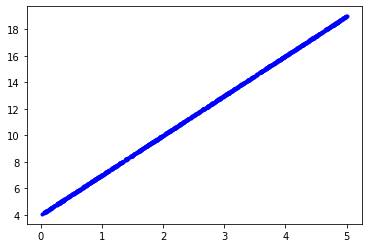

In [2]:
import matplotlib
import matplotlib.pyplot as plt

plt.plot(coffee, energy, 'b.')
plt.show()

The dataset does indeed have an $x$ range from 0 to the max $x$-value of 5. Notice that the $y$-intercept and slope match our seeded values.

This dataset looks nothing like what we'd see in the real world, though. It would be trivial to fit a line to the data as is; the data is already a straight line. Let's add a little randomness to the data to make it more realistic.

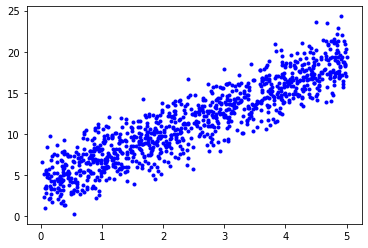

In [3]:
energy = energy + 2 * np.random.randn(DATA_SET_SIZE, 1)

plt.plot(coffee, energy, 'b.')
plt.show()

That's much better! There is still a linear trend to the data, but there is much more noise.

# Running the Regression

scikit-learn performs linear regression in its `LinearRegression` module.

In [4]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(coffee, energy)
lin_reg.coef_, lin_reg.intercept_ # The slope (weights of the feature) and y-intercept of the regression line.

(array([[3.0263932]]), array([3.90939913]))

Not bad! The random noise we added to the data prevented us from exactly predicting the slope and intercept, but our calculations were pretty close.

We can use this slope and intercept to predict new $y$-values given some $x$-values.

In [5]:
coffee_ = np.array([[0.34], [1.65], [2.45], [3.78], [4.56]])

energy_predict = lin_reg.predict(coffee_)
energy_predict

array([[ 4.93837282],
       [ 8.90294791],
       [11.32406248],
       [15.34916544],
       [17.70975213]])

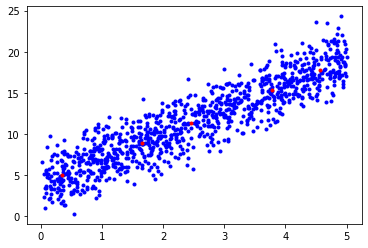

In [6]:
plt.plot(coffee, energy, 'b.')
plt.plot(coffee_, energy_predict, 'r.')
plt.show()

And we can use two extreme $x$-values 0 and `X_MAX` to draw the regression line.

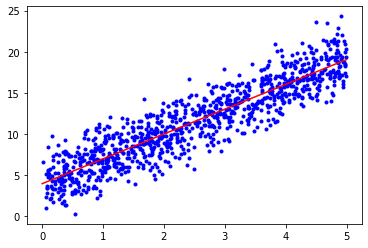

In [7]:
coffee_ = np.array([[0.0], [X_MAX]])
energy_predict = lin_reg.predict(coffee_)

plt.plot(coffee, energy, 'b.')
plt.plot(coffee_, energy_predict, 'r-')
plt.show()

# Stochastic Gradient Descent

It is not always practical to run a linear regression using the entire training data set. For cases where training using the entire set is impractical, the stochastic gradient descent method can be used. In scikit-learn this is implemented via the `SGDRegressor`.

In [8]:
from sklearn.linear_model import SGDRegressor

# Create a new Stochastic Gradient Descent regressor.
sgd_reg = SGDRegressor()

# Fit the model.
sgd_reg.fit(coffee, energy.ravel())

# Display the slope and intercept.
sgd_reg.coef_, sgd_reg.intercept_

(array([3.09924724]), array([3.88926376]))

You might notice that the slope and intercept aren't as accurate as what we were getting when processing the entire dataset. This is because the SGDRegressor is only using a subset of the training data.

Let's compare the regression lines calculated by the full linear regressor and the SGD one.

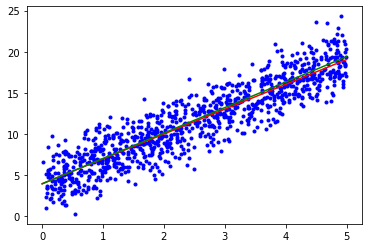

In [9]:
coffee_ = np.array([[0.0], [5.0]])

lin_predict = lin_reg.predict(coffee_)
sgd_predict = sgd_reg.predict(coffee_)

plt.plot(coffee, energy, 'b.')
plt.plot(coffee_, lin_predict, 'r-')
plt.plot(coffee_, sgd_predict, 'g-')
plt.show()

It might be hard to see, but the red and green lines are *almost* the same but not quite.

### Challenge: Regressor Parameters

The SGDRegressor has many parameters that can be tuned. Out of the box, our regressor didn't do that well. Let's see if we can tune some of the parameters of the regressor to get its predicted values for the slope and intercept closer to those we predicted using the entire dataset.

Check out the [SGDRegressor documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html) and look over the parameters available. Pay special attention to parameters related to learning rate and iterations over the data. See if you can tweak the parameters to get within some threshold `EPISLON` of the calculated values below.

In [11]:
import numpy as np
from sklearn.linear_model import SGDRegressor

np.random.seed(21)

# Initialize the dataset attributes.
DATA_SET_SIZE = 1000
X_MAX = 5
INTERCEPT = 4
SLOPE = 3

# Generate the randomized dataset.
coffee = X_MAX * np.random.rand(DATA_SET_SIZE, 1)
energy = SLOPE * coffee + INTERCEPT + 2 * np.random.randn(DATA_SET_SIZE, 1)

sgd_reg = SGDRegressor(max_iter=50, tol=None, eta0=0.01) # model hyperparameter tuning

# Fit the model.
sgd_reg.fit(coffee, energy.ravel())

EPSILON = 0.05

print(sgd_reg.coef_, sgd_reg.intercept_)
if abs(SLOPE - sgd_reg.coef_) < EPSILON and abs(INTERCEPT - sgd_reg.intercept_) < EPSILON:
  print("You win!")
else:
  print("Try again :(")

[2.97462207] [3.98412294]
You win!


---

# Optional: The Normal Equation

If the dataset being processed is small enough, then the slope and $y$-intercept of the regression line can be calculated in-memory exactly. The matrix normal equation can easily be written in NumPy, as seen below.

In [12]:
# x is an Nx1 matrix containing our x-values. The first step in calculating the
# normal equation is to create an Nx2 matrix where each "row" has the value 1
# and the x value.
coffee_ = np.c_[np.ones((DATA_SET_SIZE, 1)), coffee]

norm = np.linalg.inv(coffee_.T.dot(coffee_)).dot(coffee_.T).dot(energy)

calculated_intercept = norm[0][0]
calculated_slope = norm[1][0]

print("Calculated slope {} vs actual {}".format(calculated_slope, SLOPE))
print("Calculated intercept {} vs actual {}".format(calculated_intercept,
                                                    INTERCEPT))

Calculated slope 2.9912319026307 vs actual 3
Calculated intercept 3.9871540868029354 vs actual 4


Notice that these values are the same as scikit-learn calculated above.

We can now use these values to make predictions.

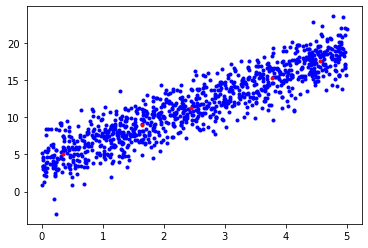

In [13]:
# Create a (5,1) matrix containing values to make predictions on.
coffee_ = np.array([[0.34], [1.65], [2.45], [3.78], [4.56]])

# Convert the matrix to a (5, 2) matrix with ones in the first column
# in order to perform a dot-product against the calculated slope and
# intercept.
coffee_predict = np.c_[np.ones((5, 1)), coffee_]

# Make the predictions.
energy_predict = coffee_predict.dot(norm)

# Plot the original data as blue dots.
plt.plot(coffee, energy, 'b.')

# Plot the predictions as red dots.
plt.plot(coffee_, energy_predict, 'r.')
plt.show()

To plot the calculated line as we did for the scikit-learn regression, we can just plug in 0 and 5 (`X_MAX`) to the equation.

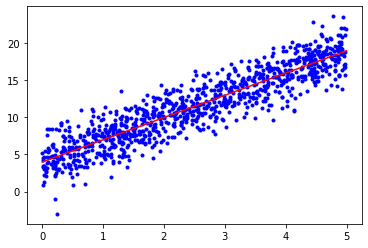

In [15]:
coffee_ = np.array([[0.0], [X_MAX]])
coffee_predict = np.c_[np.ones((2,1)), coffee_]
energy_predict = coffee_predict.dot(norm)

plt.plot(coffee, energy, 'b.')
plt.plot(coffee_, energy_predict, 'r-')
plt.show()

### Challenge: Pseudoinverse

It turns out that the math operations used to calculate the Normal Equation are quite expensive. We'll explore other methods of performing a linear regression soon, but there is a purely mathematical optimization that has been discovered. The equation uses the **pseudoinverse** of the input matrix to predict $y$.

Find the NumPy function that calculates the pseudoinverse of a matrix, and then use that function to write a more optimal method for finding the slope and intercept for a linear regression.

In [ ]:
import numpy as np

np.random.seed(21)

# Initialize the dataset attributes.
DATA_SET_SIZE = 1000
X_MAX = 5
INTERCEPT = 4
SLOPE = 3

# Generate the dataset.
coffee = X_MAX * np.random.rand(DATA_SET_SIZE, 1)
energy = SLOPE * coffee + INTERCEPT

# Create the matrix.
coffee_ = np.c_[np.ones((DATA_SET_SIZE, 1)), coffee]

norm2 = [[0], [0]] # TODO(you): Update this line to perform an in-memory 
                   # calculation of a linear regression using the optimized 
                   # pseudoinverse equation in the place of the [[0], [0]]
                   # matrix.

calculated_intercept2 = norm2[0][0] 
calculated_slope2 = norm2[1][0]

EPSILON = 0.00001

if (abs(SLOPE - calculated_slope2) < EPSILON and
    (abs(INTERCEPT - calculated_intercept2)) < EPSILON):
  print("You win!")
else:
  print("Try again :(")

---

# Exercises

For these exercises, we will download a CSV of life expectancies from [GapMinder](https://www.gapminder.org/data/) and create a linear regression predicting life expectancy in the United States.

## Exercise 1: Obtain the Data

Download a CSV of life expectancy data from [GapMinder](https://www.gapminder.org/data/), upload it to this Colab, and read the data into memory using Pandas.

Examine the data using describe.

### Student Solution

In [ ]:
# Your code goes here

---

## Exercise 2: Inspect the Data

Examine the data using head and/or tail.

### Student Solution

In [ ]:
# Your code goes here

---

## Exercise 3: Preprocess Life Expectancy Column

Extract the life expectancy values for the United States into a NumPy array. 

To do this you'll need to find the row that contains data for the United States. When you find that row of data, you'll find the word 'United States' in the first column and then floating point numbers in subsequent columns. The goal of this step is to create a NumPy array containing those numbers, but excluding the first column with the title 'United States'.

### Student Solution

In [ ]:
# Your code goes here

---

## Exercise 4: Create Yearly Data

Now we need to create an array of year data from the minimum to the maximum year in the dataset. There are a few ways that this can be done.

The column names (except column 0) are the years. You can extract those years into an array, similarly to what you did for life expectancy. Note that the column names are strings, so you'll want to convert them into integers.

If no years are missing from the dataset, you can also just use a range function to generate numbers between the min and max years.

### Student Solution

In [ ]:
# Your code goes here

---

## Exercise 5: Plot the Data

Create a scatterplot of the data.

### Student Solution

In [ ]:
# Your code goes here

---

## Exercise 6: Subset the Data

Split off 20% of the data as a test set, and keep the rest for training.

To do this it will be useful to create a `DataFrame` and store the years and life expectancy arrays created above as columns in that dataframe.

You can then randomize and split the dataframe, or use scikit-learn's built in test/train data splitter.

### Student Solution

In [ ]:
# Your code goes here

---

## Exercise 7: Train a Model

Use `LinearRegression` in scikit-learn to create a model.

### Student Solution

In [ ]:
# Your code goes here

---

## Exercise 8: Test Your Model

Use the test data you put aside to make predictions of life expectancy based on year. Compare the predictions to the actual data by using scikit-learn to calculate the root mean squared error.

### Student Solution

In [ ]:
# Your code goes here

---

## Exercise 9: Plot Your Regression

Create a scatter plot of the full set of life expectancy data. Draw your regression line over the scatterplot.

### Student Solution

In [ ]:
# Your code goes here

---

## Challenge

The [CalCOFI dataset](https://www.kaggle.com/sohier/calcofi/version/2) contains decades of oceanic data. In this exercise, we will use this data to attempt to predict water temperature based on salinity. The exercise is divided into multiple steps, each with a code block after it for your solution.

### Student Solution

**Acquire the data**

The [CalCOFI data](https://www.kaggle.com/sohier/calcofi/version/2) consists of two files, one containing data about *Casts* and the other about *Bottles*. Look at the data files and try to get an understanding of what a cast is and what a bottle is.

Find the file that contains temperature and salinity information, download that file, and then upload it to Colab. You'll want to use the zipped version of the file, so that the upload doesn't take too long.

Once the file is uploaded, use Python to unzip the file.

In [ ]:
# Your code goes here

**Load the data using Pandas**

Now that you have an unzipped version of the file, you can load the data into memory using Pandas. Write code to read the file into memory and describe the data table that you created.

In [ ]:
# Your code goes here

**Drop rows with missing data**

Looking at the counts for temperature and salinity, you can see that there are some rows with missing data. Remove the rows with missing temperature or salinity data from the dataframe. After you are done, describe the data to make sure that every temperature and salinity row contains data.

In [ ]:
# Your code goes here

**Plot the data**

Create a scatterplot of salinity and temperature.

In [ ]:
# Your code goes here

**Shuffle the data**

In this exercise, we will split the data into a training set and a test set. Since the data is ordered, we need to shuffle the dataframe before splitting it. Write code to shuffle the dataframe, and look at the data (using `head`, `tail`, or some other means) to make sure that it is shuffled.

In [ ]:
# Your code goes here

**Split the data into train/test**

For this exercise we'll split the data frame so that 20% of the data is held out for testing, and the remaining data is used for training. Write code to split the data into two dataframes: one for testing and one for training.

In [ ]:
# Your code goes here

**Create a linear regression model**

Use scikit-learn to fit a linear regression model to your training data.

In [ ]:
# Your code goes here

**Test your model**

Use your test data to make predictions and then find the mean squared error of those predictions vs. the actual measured temperatures for the test data.
(scikit-learn has functionality to calculate the mean squared error.)

In [ ]:
# Your code goes here

**Plot your regression line**

Create another plot that contains the scatterplot of the salinity and temperatures. Draw the prediction line over the scatterplot.

In [ ]:
# Your code goes here

**Dig deeper**

The model we built wasn't very good, but we only used one feature. Are there other features or combinations of features that are more predictive of temperature?

Measurements were recorded at different depths. Is salinity a good predictor of temperature at any depth range?

In [ ]:
# Your code goes here

---